# Clustering KMeans

Dataset: countries

In [138]:
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

Explorar df_earthquake y detectar similitudes utilizando clustering

## Carga de datos

In [139]:
df = pd.read_csv('../../../Data/03Limpio/03desastreslimpio.csv')
df.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4,29,1903,4,29,76,23,0
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,0,0,1903,0,0,17,0,0
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8,13,1905,8,13,18,18,0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [140]:
df.shape

(16636, 26)

In [141]:
df.describe()

,Year,Seq,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
count,16636.000000,16636.000000,1.663600e+04,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,1.663600e+04,1.663600e+04,1.663600e+04
mean,1997.838363,724.950228,1.420815e+04,1997.847259,6.285886,11.925824,1997.901779,6.301094,12.458103,1.956042e+03,5.166733e+05,4.053807e+05
std,20.353457,1940.995621,1.707866e+05,20.352028,3.500460,10.100268,20.340092,3.550374,10.190007,5.684044e+04,6.474546e+06,4.023244e+06
min,1900.000000,1.000000,-5.700000e+01,1900.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1990.000000,95.000000,0.000000e+00,1990.000000,3.000000,1.000000,1990.000000,3.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2002.000000,274.000000,0.000000e+00,2002.000000,7.000000,11.000000,2002.000000,7.000000,12.000000,8.000000e+00,1.200000e+03,0.000000e+00
75%,2012.000000,495.000000,6.000000e+00,2012.000000,9.000000,21.000000,2012.000000,9.000000,21.000000,3.600000e+01,2.306500e+04,1.404000e+04
max,2023.000000,9881.000000,1.302587e+07,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,3.700000e+06,3.300000e+08,2.732184e+08


# Preparación de dataset df_earthquake

## Filtro Earthquake

In [142]:
# Filtro principal para Earthquake
df_earthquake = df[df['Disaster Type'] == 'Earthquake']

## Borrar columnas

In [143]:
df_earthquake.drop(columns=['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'ISO', 'Latitude', 'Longitude'], inplace=True)

C:\Users\AleEng\AppData\Local\Temp\ipykernel_2408\3624670092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earthquake.drop(columns=['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'ISO', 'Latitude', 'Longitude'], inplace=True)


## EDAs

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Central America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Eastern Asia'),
  Text(4, 0, 'Western Europe'),
  Text(5, 0, 'Northern Africa'),
  Text(6, 0, 'South-Eastern Asia'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'Northern America'),
  Text(9, 0, 'Southern Europe'),
  Text(10, 0, 'Western Africa'),
  Text(11, 0, 'Caribbean'),
  Text(12, 0, 'Western Asia'),
  Text(13, 0, 'Eastern Africa'),
  Text(14, 0, 'Australia and New Zealand'),
  Text(15, 0, 'Russian Federation'),
  Text(16, 0, 'Melanesia'),
  Text(17, 0, 'Northern Europe'),
  Text(18, 0, 'Polynesia'),
  Text(19, 0, 'Middle Africa'),
  Text(20, 0, 'Southern Africa'),
  Text(21, 0, 'Central Asia'),
  Text(22, 0, 'Micronesia')])

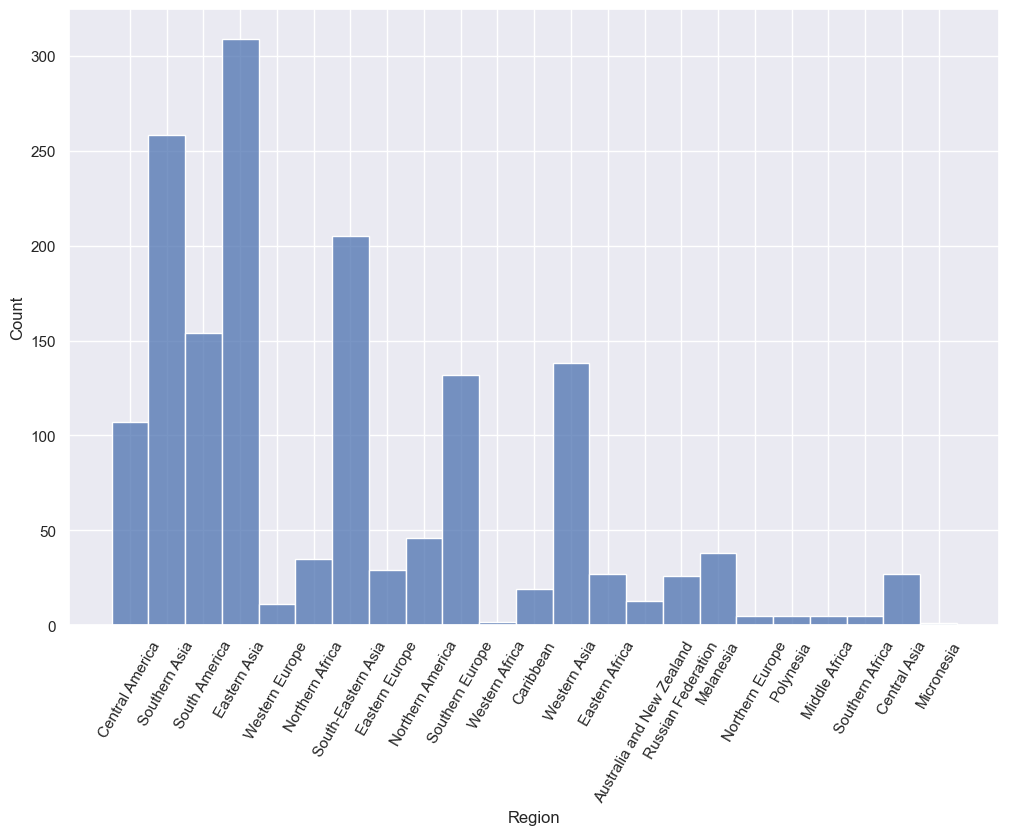

In [144]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_earthquake, x='Region')
plt.xticks(rotation=60)

In [145]:
df_earthquake['Region'].unique()

array(['Central America', 'Southern Asia', 'South America',
       'Eastern Asia', 'Western Europe', 'Northern Africa',
       'South-Eastern Asia', 'Eastern Europe', 'Northern America',
       'Southern Europe', 'Western Africa', 'Caribbean', 'Western Asia',
       'Eastern Africa', 'Australia and New Zealand',
       'Russian Federation', 'Melanesia', 'Northern Europe', 'Polynesia',
       'Middle Africa', 'Southern Africa', 'Central Asia', 'Micronesia'],
      dtype=object)

## Clusters para Región

In [146]:
# Regiones específicas por filtrar
# america_regions_filter = ['Northern America', 'Central America', 'South America']
# europe_regions_filter = ['Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe']
asia_regions_filter = ['Southern Asia', 'Eastern Asia', 'South-Eastern Asia', 'Western Asia', 'Central Asia']

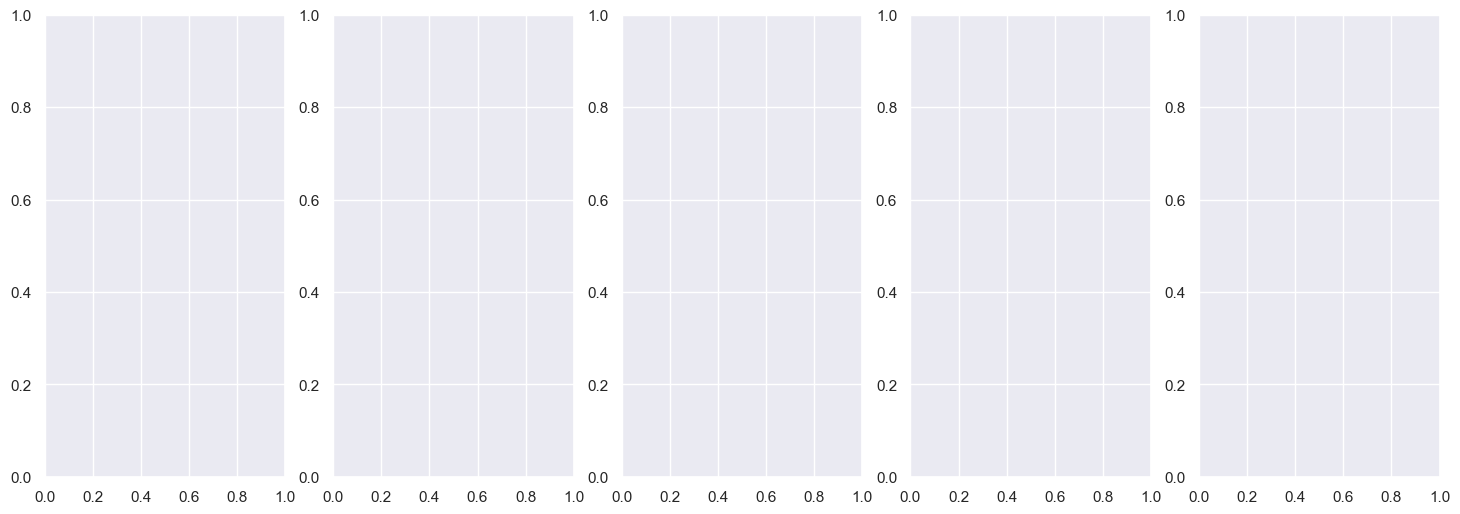

In [147]:
# Crear subplots para cada region
fig, axes = plt.subplots(nrows=1, ncols=len(asia_regions_filter), figsize=(18, 6))
# fig, axes = plt.subplots(nrows=1, ncols=len(europe_regions_filter), figsize=(18, 6))

### Región: Asia

In [148]:
# Filtro Region Asia
asia_regions_filter = ['Southern Asia', 'Eastern Asia', 'South-Eastern Asia', 'Western Asia', 'Central Asia']

In [149]:
df_earthquake['Origin'].unique()

array([nan, 'Earthquake', 'Volacno and landslide', 'Landslide',
       'Earthquake and landslide', 'Sub-marine volcano'], dtype=object)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 148, cost: 1614.0
Run 1, iteration: 2/100, moves: 53, cost: 1614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 781, cost: 1520.0
Run 2, iteration: 2/100, moves: 134, cost: 1460.0
Run 2, iteration: 3/100, moves: 6, cost: 1460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 618, cost: 1460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23, cost: 1528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1513.0
Best run was number 2


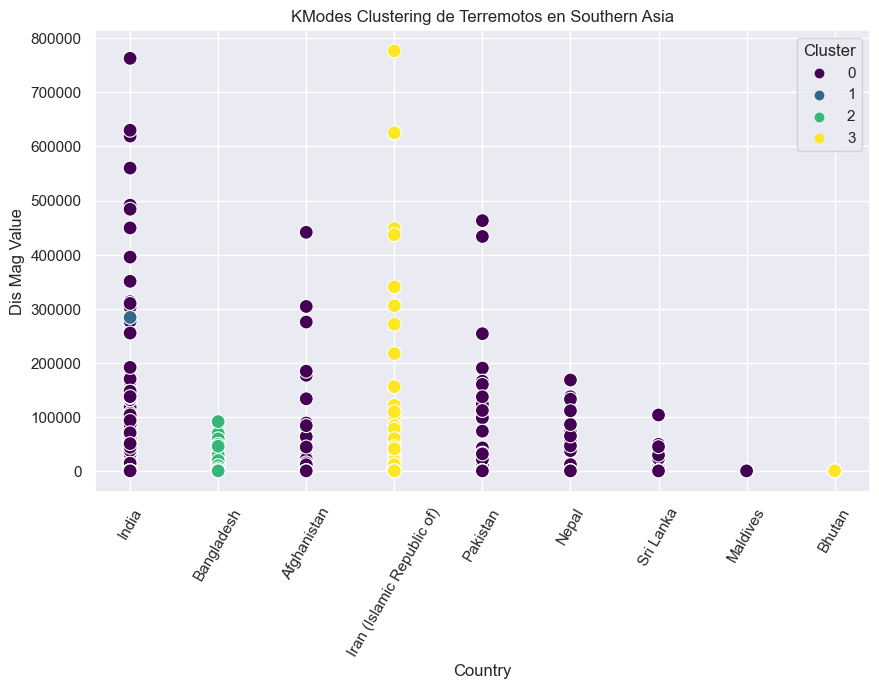

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 329, cost: 1322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 347, cost: 1325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 263, cost: 1003.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 960.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 237, cost: 1034.0
Best run was number 4


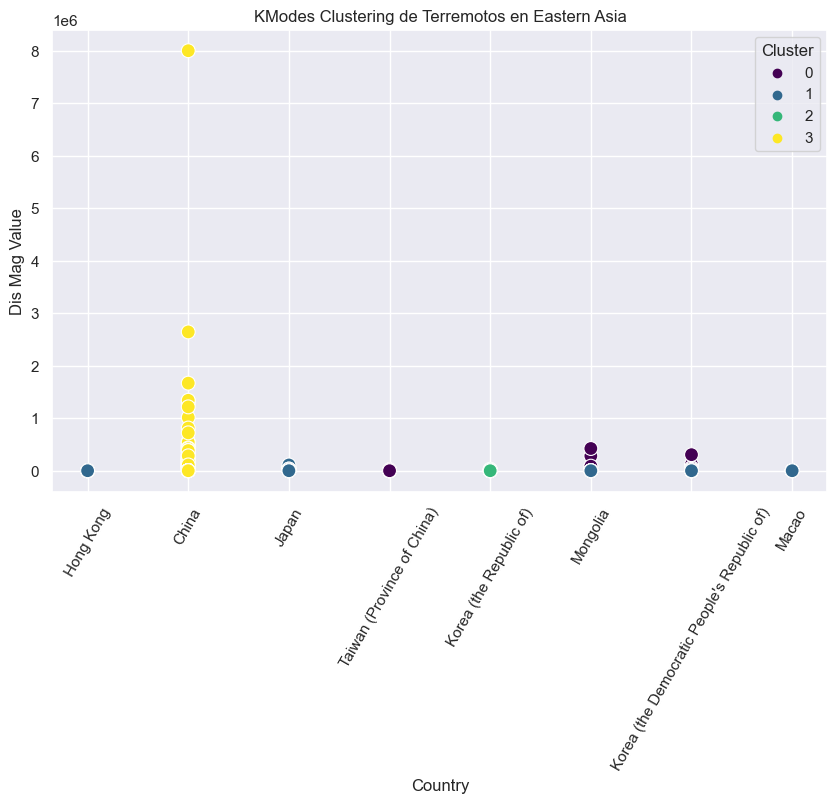

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 202, cost: 1263.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 197, cost: 1338.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1385.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18, cost: 1081.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 973.0
Best run was number 5


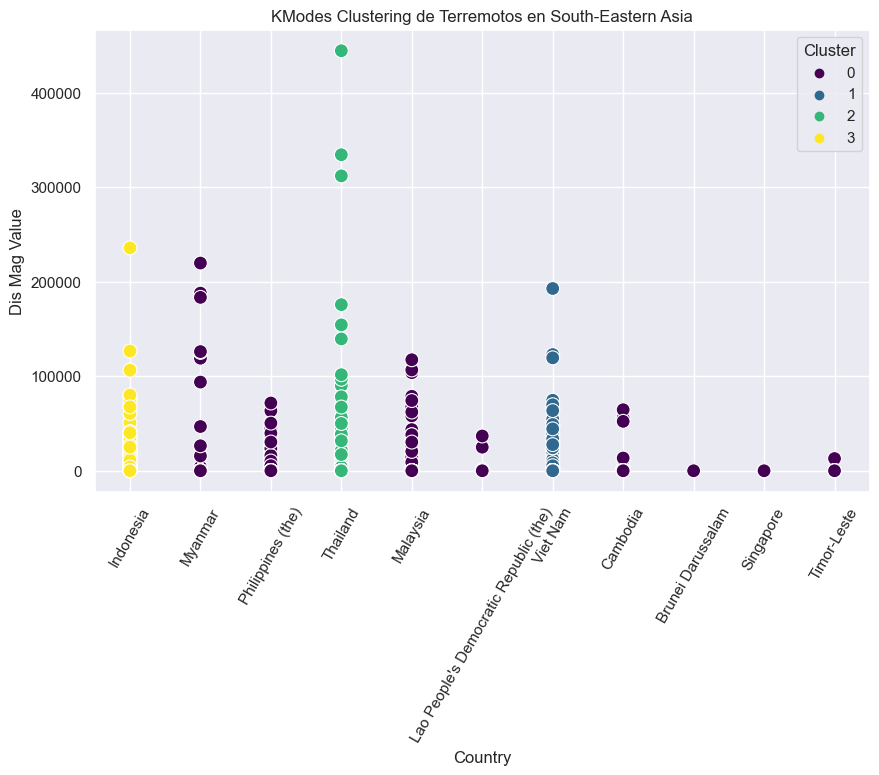

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 94, cost: 384.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 94, cost: 433.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 209, cost: 423.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 193, cost: 443.0
Best run was number 1


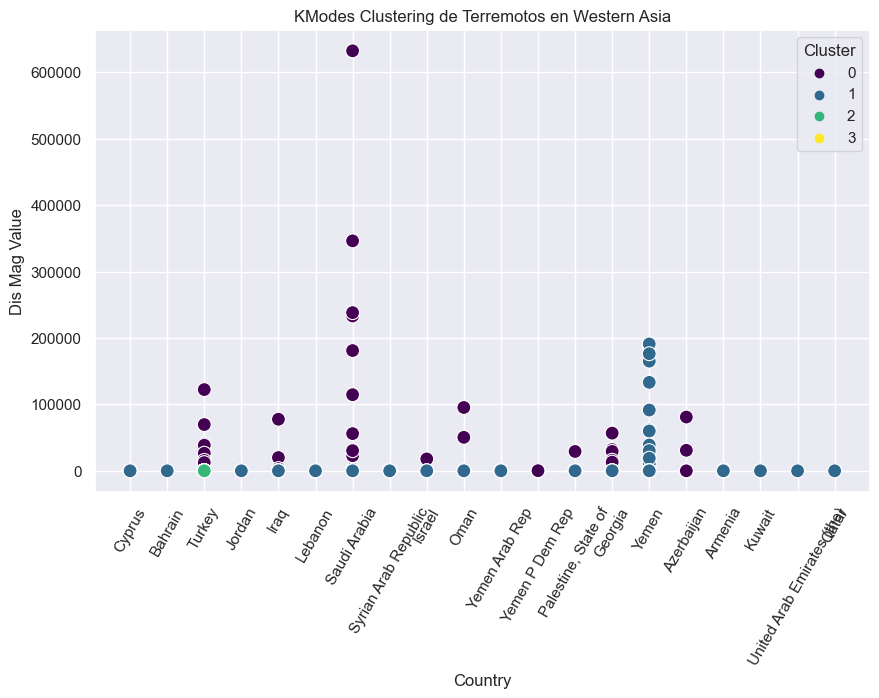

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 92.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 97.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 97.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 31, cost: 71.0
Run 4, iteration: 2/100, moves: 14, cost: 71.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 71.0
Best run was number 4


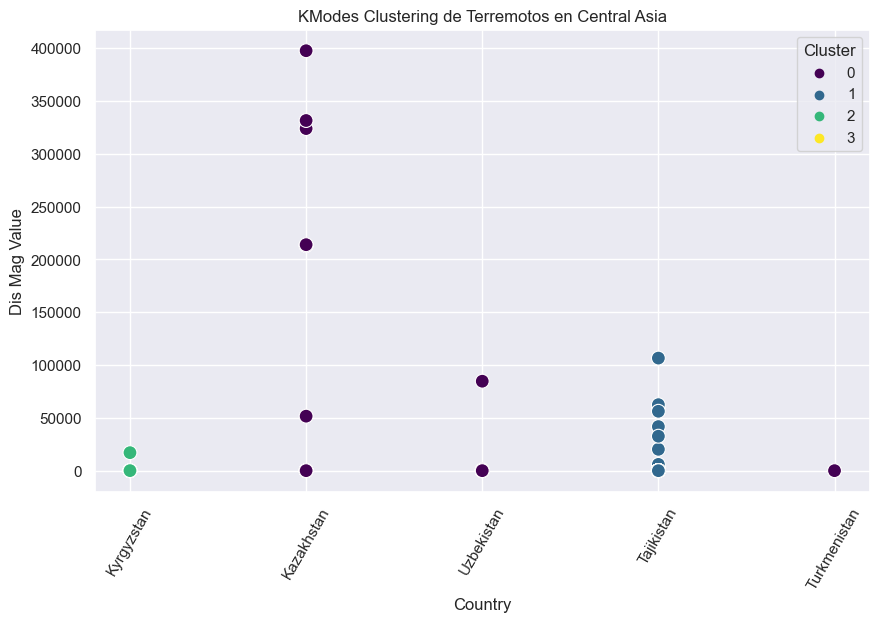

In [150]:
# Iterar a través de cada region y realizar clustering
for i, region in enumerate(asia_regions_filter):
    region_filter = df['Region'] == region
    filtered_region_df = df[region_filter]
    
    # Seleccionar columnas para clustering
    selected_columns = ['Country', 'Dis Mag Value']
    
    # Borrar filas con valores faltantes en columnas seleccionadas
    filtered_region_df = filtered_region_df.dropna(subset=selected_columns)
    
    # Aplicar KModes clustering con el número de clusters (k)
    k = 4
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
    cluster_labels = kmodes.fit_predict(filtered_region_df[selected_columns])
    
    # Añadir etiquetas cluster al DataFrame
    filtered_region_df['Cluster'] = cluster_labels
    
    # Scatter plots de clusters 
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_region_df, x='Country', y='Dis Mag Value', hue='Cluster', palette='viridis', s=100)
    plt.xlabel('Country')
    plt.ylabel('Dis Mag Value')
    plt.title(f'KModes Clustering de Terremotos en {region}')
    plt.legend(title='Cluster')
    plt.xticks(rotation=60)
    plt.show()


In [154]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('Country', ascending=False), x='Region', y='Country')
plt.xticks(rotation=45)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Associated Dis', y ='Origin', hue='Region', palette='Set1')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP ($ per capita)', y ='Literacy (%)', hue='Region', palette='Set1')

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

In [ ]:
"""
El método clustermap() utiliza agrupación jerárquica para ordenar los datos por similitud, sin necesidad de especificar un número concreto de clústers. Reorganiza los datos de las filas y columnas y muestra el contenido similar uno al lado de otro para una comprensión más profunda.
"""
plt.figure(figsize=(20,15), dpi=200)
sns.clustermap(df.corr().round(2), cmap='viridis', annot=True)

## Data preparation

### Valores faltantes

In [ ]:
df.isnull().sum()

In [ ]:
filter = df['Agriculture'].isnull()
df[filter]['Country']

In [ ]:
df[filter] = df[filter].fillna(0)

In [ ]:
df.isnull().sum()

In [ ]:
df['Region'].unique()

In [ ]:
climate_mean = df.groupby('Region')['Climate'].transform('mean')
climate_mean

In [ ]:
df['Climate'] = df['Climate'].fillna(climate_mean)

In [ ]:
df.isnull().sum()

In [ ]:
df['Origin'] = df.groupby('Region')['Origin'].transform('mean')

In [ ]:
df.isnull().sum()

In [ ]:
# Intentar imputar los valores en lugar de borrarlos
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

### Obtención X

In [ ]:
X = pd.get_dummies(df.drop('Dis Mag Value', axis=1))
X

### Escalado

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Clustering: Kmeans

1. Método del codo
2. Coeficientes de siluetas

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2, 15))
visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
wcss = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

pd.Series(wcss).diff().plot(kind='bar')

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,10):
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=i), color='sns_bright')
    visualizer.fit(X_scaled)
    # visualizer.fit(X)
    visualizer.show()

In [ ]:
model = KMeans(3)
model.fit(X_scaled)
X_cluster = X.copy()
X_cluster['cluster'] = model.labels_

In [ ]:
X_cluster.head()

In [ ]:
X_cluster.corr()['cluster'].sort_values()

In [ ]:
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(X_cluster.corr().round(2), cmap='viridis', annot=True)

In [ ]:
sns.countplot(data=X_cluster, x='cluster')

In [ ]:
import plotly.express as px
px.histogram(X_cluster, x='cluster', color='cluster')

## Visualización resultados

Buscar códigos ISO de países para utilizarlos en la visualización de los clusters sobre un mapa del mundo

In [ ]:
df_iso = pd.read_csv('../../../Data/03Limpio/03desastreslimpio.csv')
df_iso.head(20)

In [ ]:
df_iso.shape

In [ ]:
iso_codes = df_iso.set_index('Country')['ISO'].to_dict()
iso_codes

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Mapeo/transformación de Country (texto) a ISO Code (texto)
df['ISO'] = df['Country'].map(iso_codes)

In [ ]:
df['cluster'] = X_cluster['cluster']

In [ ]:
df.head()

In [ ]:
px.choropleth(df, locations='ISO', color='cluster', hover_name='Country')